In [1]:
from statsmodels.tsa.stattools import grangercausalitytests as granger
from statsmodels.tsa.stattools import adfuller as adf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os

In [2]:
# define adf wrapper
def adf_test(series):
    results = adf(series, autolag="AIC")
    output = pd.Series(results[0:4], index=["Test Statistic", "p-Value", "Lags Used", "Observations Used"])
    
    for k, v in results[4].items():
       output["Critical Value ({})".format(k)] = v

    return output

## Grab the data

In [3]:
stone_dir = "/Users/david/Documents/masters/thesis/data/stone-data"
ornl_dir = "/Users/david/Documents/masters/thesis/data/ornl-data"

In [4]:
dfs = {}

# for each vehicle, load df from every capture
for d in [stone_dir, ornl_dir]:
    d_dir = os.path.join(d, "pipeline-output")
    print(d_dir)
    
    for v in os.listdir(d_dir):
        v_dir = os.path.join(d_dir, v)

        # skip non-directory junk
        if os.path.isdir(v_dir):
            for c in os.listdir(v_dir):
                c_dir = os.path.join(v_dir, c)

                # skip non-directory junk
                if os.path.isdir(c_dir):
                    path = os.path.join(c_dir, "pickleCombinedDataFrame.p")
                    dfs["{},{},{}".format(d,v,c)] = pickle.load(open(path, "rb"))

/Users/david/Documents/masters/thesis/data/stone-data/pipeline-output
/Users/david/Documents/masters/thesis/data/ornl-data/pipeline-output


/Users/david/Documents/masters/thesis/data/stone-data,honda_accord_2015,0 

0	(stationary)
Test Statistic             -5.302292
p-Value                     0.000005
Lags Used                  47.000000
Observations Used       25762.000000
Critical Value (1%)        -3.430604
Critical Value (5%)        -2.861652
Critical Value (10%)       -2.566830
dtype: float64


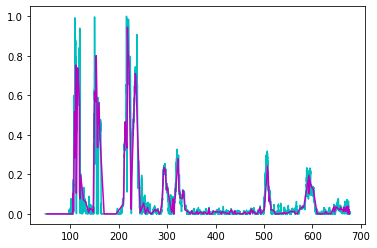

1	(stationary)
Test Statistic         -6.884306e+00
p-Value                 1.407370e-09
Lags Used               4.900000e+01
Observations Used       2.576000e+04
Critical Value (1%)    -3.430604e+00
Critical Value (5%)    -2.861652e+00
Critical Value (10%)   -2.566830e+00
dtype: float64


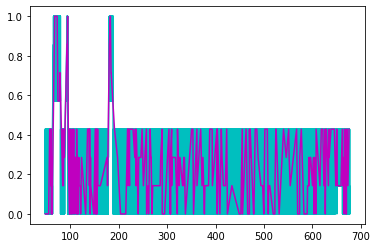

2	(stationary)
Test Statistic         -1.697607e+01
p-Value                 9.084449e-30
Lags Used               4.800000e+01
Observations Used       2.576100e+04
Critical Value (1%)    -3.430604e+00
Critical Value (5%)    -2.861652e+00
Critical Value (10%)   -2.566830e+00
dtype: float64


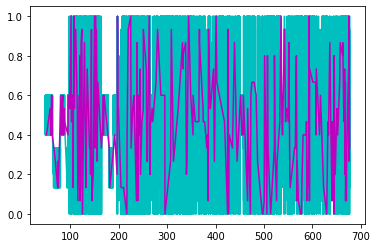

3	(stationary)
Test Statistic         -9.927166e+00
p-Value                 2.886439e-17
Lags Used               3.700000e+01
Observations Used       2.577200e+04
Critical Value (1%)    -3.430604e+00
Critical Value (5%)    -2.861652e+00
Critical Value (10%)   -2.566830e+00
dtype: float64


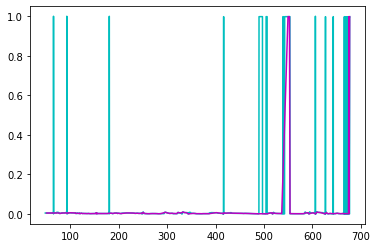

4	(stationary)
Test Statistic         -1.514321e+01
p-Value                 6.963247e-28
Lags Used               4.700000e+01
Observations Used       2.576200e+04
Critical Value (1%)    -3.430604e+00
Critical Value (5%)    -2.861652e+00
Critical Value (10%)   -2.566830e+00
dtype: float64


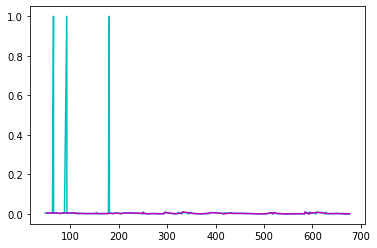

5	(stationary)
Test Statistic         -7.429633e+00
p-Value                 6.411359e-11
Lags Used               2.000000e+01
Observations Used       2.578900e+04
Critical Value (1%)    -3.430604e+00
Critical Value (5%)    -2.861652e+00
Critical Value (10%)   -2.566830e+00
dtype: float64


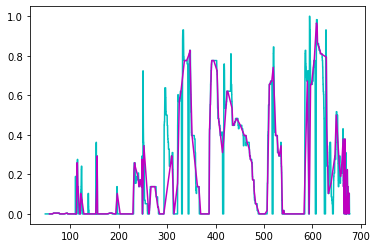

6	(stationary)
Test Statistic            -26.145334
p-Value                     0.000000
Lags Used                  19.000000
Observations Used       25790.000000
Critical Value (1%)        -3.430604
Critical Value (5%)        -2.861652
Critical Value (10%)       -2.566830
dtype: float64


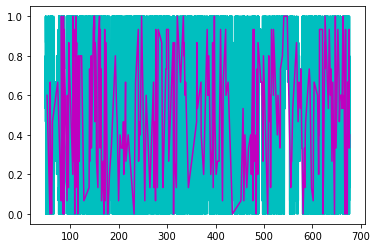

7	(not stationary)
Test Statistic             -0.998012
p-Value                     0.753989
Lags Used                  49.000000
Observations Used       25760.000000
Critical Value (1%)        -3.430604
Critical Value (5%)        -2.861652
Critical Value (10%)       -2.566830
dtype: float64


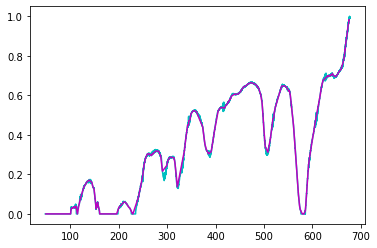

8	(not stationary)
Test Statistic             -0.998012
p-Value                     0.753989
Lags Used                  49.000000
Observations Used       25760.000000
Critical Value (1%)        -3.430604
Critical Value (5%)        -2.861652
Critical Value (10%)       -2.566830
dtype: float64


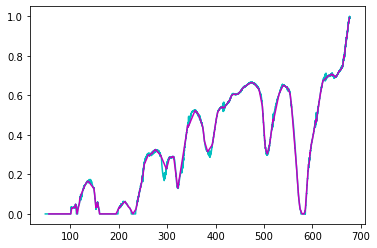

9	(not stationary)
Test Statistic             12.507059
p-Value                     1.000000
Lags Used                  49.000000
Observations Used       25760.000000
Critical Value (1%)        -3.430604
Critical Value (5%)        -2.861652
Critical Value (10%)       -2.566830
dtype: float64


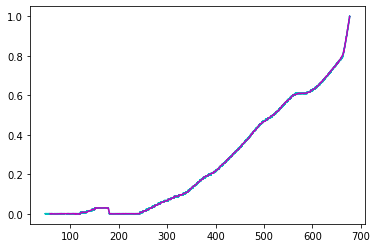

In [5]:
# plot some example time series
for k in list(dfs.keys())[:1]:
    print(k, "\n")
    
    # get the dataframe
    df = dfs[k]
    times = np.array(df.index)
    
    for s in range(df.shape[1])[:10]:
        print(s, end="\t")
        
        # get the series
        series = df[df.columns[s]].to_numpy()
        
        # augmented dickey-fuller
        results = adf_test(series)
        
        # if the series is stationary...
        if results["Test Statistic"] < results["Critical Value (1%)"]:
            print("(stationary)")
        else:
            print("(not stationary)")
        
        # show the adf results
        print(results)

        # plot the series
        plt.plot(times, series, color="c")

        # plot a subsample of the series
        indices = np.sort(np.random.choice(len(times), size=290))
        plt.plot(times[indices], series[indices], color="m")

        # show it
        plt.show()

## Test the granger function

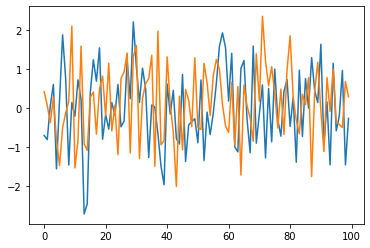


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5552  , p=0.4580  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.5726  , p=0.4492  , df=1
likelihood ratio test: chi2=0.5709  , p=0.4499  , df=1
parameter F test:         F=0.5552  , p=0.4580  , df_denom=96, df_num=1


In [6]:
# generate two random time series
n = 100
times = np.arange(n)
series1 = np.random.normal(size=n)
series2 = np.random.normal(size=n)

# plot them
plt.plot(times, series1)
plt.plot(times, series2)
plt.show()

# use the granger function
test = np.vstack((series1, series2)).T
results = granger(test, maxlag=1)
p_val = results[1][0]["params_ftest"][1]

# check null hypothesis
if p_val < 0.05:
    print("\n{A} Granger causes {B}")

(126,)


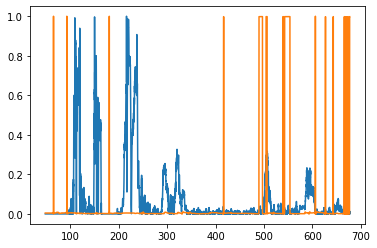


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0249  , p=0.8746  , df_denom=25806, df_num=1
ssr based chi2 test:   chi2=0.0249  , p=0.8746  , df=1
likelihood ratio test: chi2=0.0249  , p=0.8746  , df=1
parameter F test:         F=0.0249  , p=0.8746  , df_denom=25806, df_num=1


In [7]:
# grab two time series
df = list(dfs.values())[0]
times = df.index
print(df.columns.shape)
series1 = df[df.columns[0]].to_numpy()
series2 = df[df.columns[3]].to_numpy()

# plot them
plt.plot(times, series1)
plt.plot(times, series2)
plt.show()

# use the granger function
test = np.vstack((series1, series2)).T
results = granger(test, maxlag=1)
p_val = results[1][0]["params_ftest"][1]

# check null hypothesis
if p_val < 0.05:
    print("\n{A} Granger causes {B}")

In [8]:
for idx, i in enumerate(list(dfs.keys())):
    print("{}: {}".format(idx, i))

0: /Users/david/Documents/masters/thesis/data/stone-data,honda_accord_2015,0
1: /Users/david/Documents/masters/thesis/data/stone-data,honda_accord_2012,0
2: /Users/david/Documents/masters/thesis/data/stone-data,saab_97x_2009,0
3: /Users/david/Documents/masters/thesis/data/stone-data,dodge_1500_2014,0
4: /Users/david/Documents/masters/thesis/data/stone-data,nissan_370z_2015,0
5: /Users/david/Documents/masters/thesis/data/stone-data,ford_focus_2010,0
6: /Users/david/Documents/masters/thesis/data/stone-data,toyota_corolla_2009,0
7: /Users/david/Documents/masters/thesis/data/stone-data,nissan_xterra_2010,0
8: /Users/david/Documents/masters/thesis/data/stone-data,chevy_cobalt_2009,0
9: /Users/david/Documents/masters/thesis/data/stone-data,ford_f-150_2017,0
10: /Users/david/Documents/masters/thesis/data/stone-data,chevy_silverado_2011,0
11: /Users/david/Documents/masters/thesis/data/ornl-data,nissan_leaf_2011,9
12: /Users/david/Documents/masters/thesis/data/ornl-data,nissan_leaf_2011,0
13: /